In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
walmart_df = pd.read_csv('/mnt/d/intellipaat/walmart_assignment/drive-download-20230709T122717Z-001-1-1/Walmart DataSet/Walmart Dataset.csv')
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Question 1a
# If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [4]:
df = walmart_df

# Read the dataset (assuming it's loaded in a DataFrame called df)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
  # Convert date to datetime if needed

# Group by Store and calculate correlation between Weekly_Sales and Unemployment
store_corr = df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment']))

# Convert result to DataFrame and rename column
store_corr = store_corr.reset_index(name='Sales_Unemployment_Corr')

# Sort by correlation (most negatively affected stores first)
store_corr = store_corr.sort_values(by='Sales_Unemployment_Corr')

# Display the most affected stores
print("Stores most negatively affected by unemployment:")
print(store_corr.head())

Stores most negatively affected by unemployment:
    Store  Sales_Unemployment_Corr
37     38                -0.785290
43     44                -0.780076
38     39                -0.384681
41     42                -0.356355
40     41                -0.350630


---

# Question 1b
# If the weekly sales show a seasonal trend, when and what could be the reason?

In [5]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

## Aggregate monthly sales to check for seasonality

<Axes: title={'center': 'Average Monthly Sales'}, xlabel='Month'>

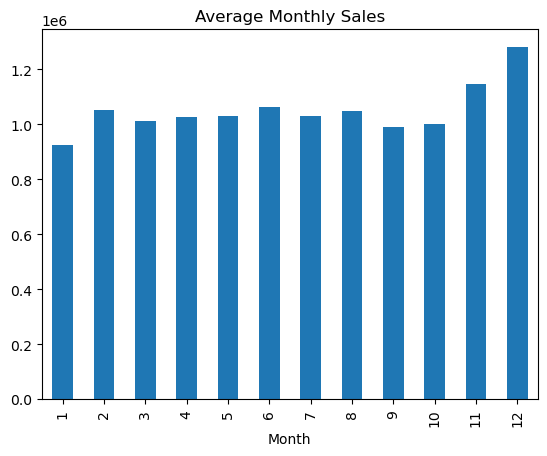

In [6]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()
monthly_sales.plot(kind='bar', title='Average Monthly Sales')

### Findings from above:
- Sales often spike in November & December — due to:
  - Black Friday
  - Christmas
  - Holiday shopping surge


- Some spikes might appear in February — due to Valentine’s Day promotions.

- Dips may occur in January or mid-year (non-holiday seasons).

## Plot time series to visualize yearly patterns:

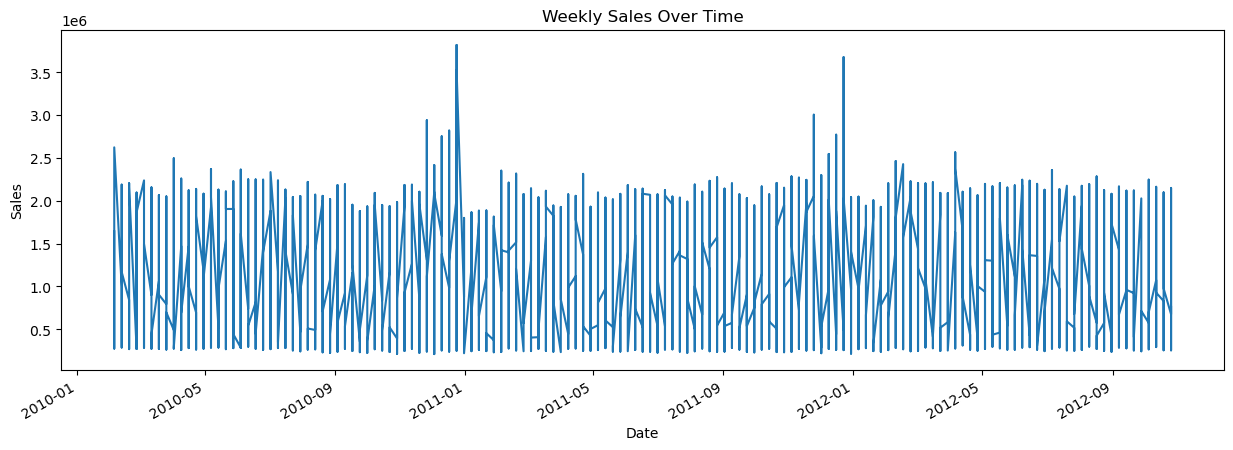

In [7]:
# df.head(3)
df.set_index('Date')['Weekly_Sales'].plot(figsize=(15, 5), title='Weekly Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()

### Findings from above:
##### Repeating peaks are the seasonality.

## Zoom into sales around holidays:

<Axes: xlabel='Date'>

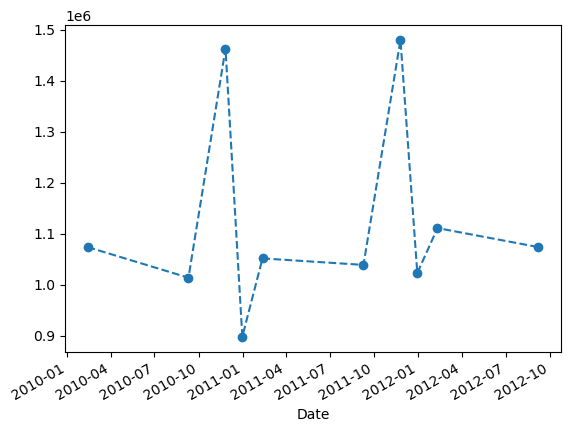

In [8]:
df[df['Holiday_Flag'] == 1].groupby('Date')['Weekly_Sales'].mean().plot(marker='o', linestyle='--')

### Findings from above:
#### This helps correlate holiday flags with sales jumps.

## Conclusion:
### When:
Mostly in Q4 (Oct–Dec) and sometimes around Valentine’s or Easter.

### Why:
  - Holiday promotions
  - Bonus payouts / year-end spending
  - Black Friday, Cyber Monday, Christmas
  - Back to school (August–September) might show smaller spikes

---

# Question 1c
# Does temperature affect the weekly sales in any manner?

## Basic Correlation

In [9]:
correlation = df['Weekly_Sales'].corr(df['Temperature'])
print("Correlation:", correlation)

Correlation: -0.06381001317946958


###  Interpretation:
 - +1 = Strong positive: as temp ↑, sales ↑
 - –1 = Strong negative: as temp ↑, sales ↓
 - ~0 = No relationship

## Visualize Relationship

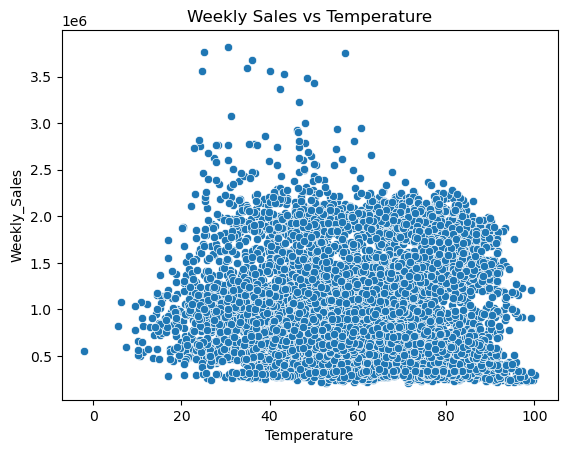

In [10]:
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title('Weekly Sales vs Temperature')
plt.show()

### Findings from above:
 - Upward trend = positive correlation
 - Downward trend = negative correlation
 - Scattered cloud = little/no relationship

## Fit a Regression Line

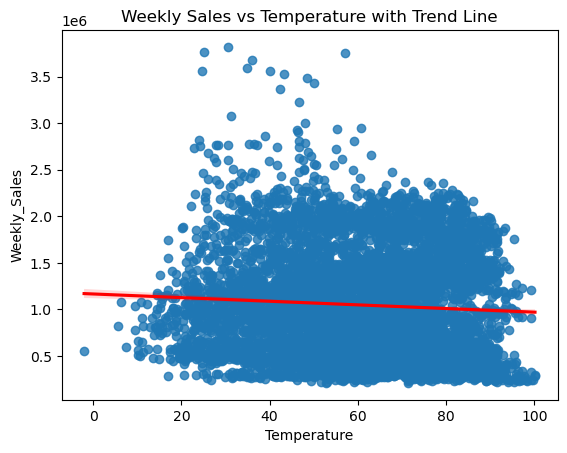

In [11]:
sns.regplot(data=df, x='Temperature', y='Weekly_Sales', line_kws={'color': 'red'})
plt.title('Weekly Sales vs Temperature with Trend Line')
plt.show()

### Real-World Interpretation:
 - In colder weather, certain product sales drop (e.g., outdoor items).
 - In hotter weather, cold drinks, fans, AC sales may rise.
 - However, other factors like holidays may dominate the effect.

---

# Question 1d
# How is the Consumer Price index affecting the weekly sales of various stores?

## Correlation Between CPI and Weekly Sales

In [12]:
correlation = df['Weekly_Sales'].corr(df['CPI'])
print("Overall CPI–Sales Correlation:", correlation)

Overall CPI–Sales Correlation: -0.07263416204017625


### Interpretation:
 - Positive correlation: Higher CPI → higher sales (might be inflation-driven)
 - Negative correlation: Higher CPI → lower sales (consumers spend less)
 - ~0: No linear relationship

## Visualize the Relationship

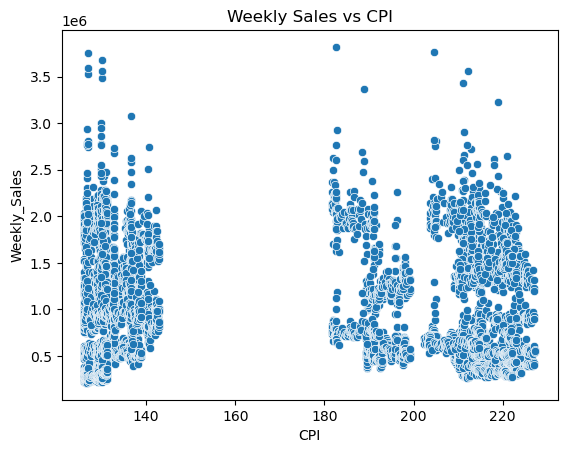

In [13]:
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title('Weekly Sales vs CPI')
plt.show()

## Store-Wise CPI Impact

In [14]:
store_cpi_corr = df.groupby('Store')[['Weekly_Sales', 'CPI']].corr().iloc[0::2,-1].reset_index()
store_cpi_corr.columns = ['Store', 'drop', 'CPI_Correlation']
store_cpi_corr.drop('drop', axis=1, inplace=True)
print(store_cpi_corr.sort_values(by='CPI_Correlation'))

    Store  CPI_Correlation
35     36        -0.915095
34     35        -0.424107
13     14        -0.419755
29     30        -0.298188
42     43        -0.285686
26     27        -0.213082
17     18        -0.193541
14     15        -0.174467
20     21        -0.163649
18     19        -0.155341
9      10        -0.115374
27     28        -0.095908
28     29        -0.072530
1       2        -0.062431
32     33        -0.052271
21     22        -0.038602
44     45        -0.023548
23     24        -0.013684
5       6        -0.011357
24     25        -0.010914
19     20         0.058706
10     11         0.069781
11     12         0.084087
22     23         0.084248
39     40         0.113318
33     34         0.115437
7       8         0.120255
15     16         0.124285
25     26         0.131980
30     31         0.132887
12     13         0.163976
31     32         0.196782
0       1         0.225408
36     37         0.244507
6       7         0.289044
8       9         0.294805
4

### Findings from above
 - This tells how each store's sales respond to CPI changes.
 - One can find which stores are more sensitive to CPI movements.

## Regression Analysis

In [15]:
import statsmodels.api as sm

X = df['CPI']
y = df['Weekly_Sales']

X = sm.add_constant(X)  # adds intercept term
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     34.12
Date:                Sun, 04 May 2025   Prob (F-statistic):           5.44e-09
Time:                        11:42:54   Log-Likelihood:                -94335.
No. Observations:                6435   AIC:                         1.887e+05
Df Residuals:                    6433   BIC:                         1.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.226e+06   3.14e+04     39.047      0.0

### Findings from above
#### A significant negative coefficient → CPI increases are hurting sales.

## Interpretation Summary:
 - If CPI is negatively correlated with sales:
   - Rising prices reduce purchasing power, leading to lower sales.

 - If positively correlated:
   - Could be due to inflation-adjusted sales or pricing strategies.

 - Store-wise variation may indicate location-specific consumer behavior.

## Visualize how the Consumer Price Index (CPI) affects Weekly Sales store-wise

In [16]:
# Selecting relevant numeric features
corr_matrix = df[['Weekly_Sales', 'CPI', 'Unemployment', 'Fuel_Price', 'Temperature']].corr()

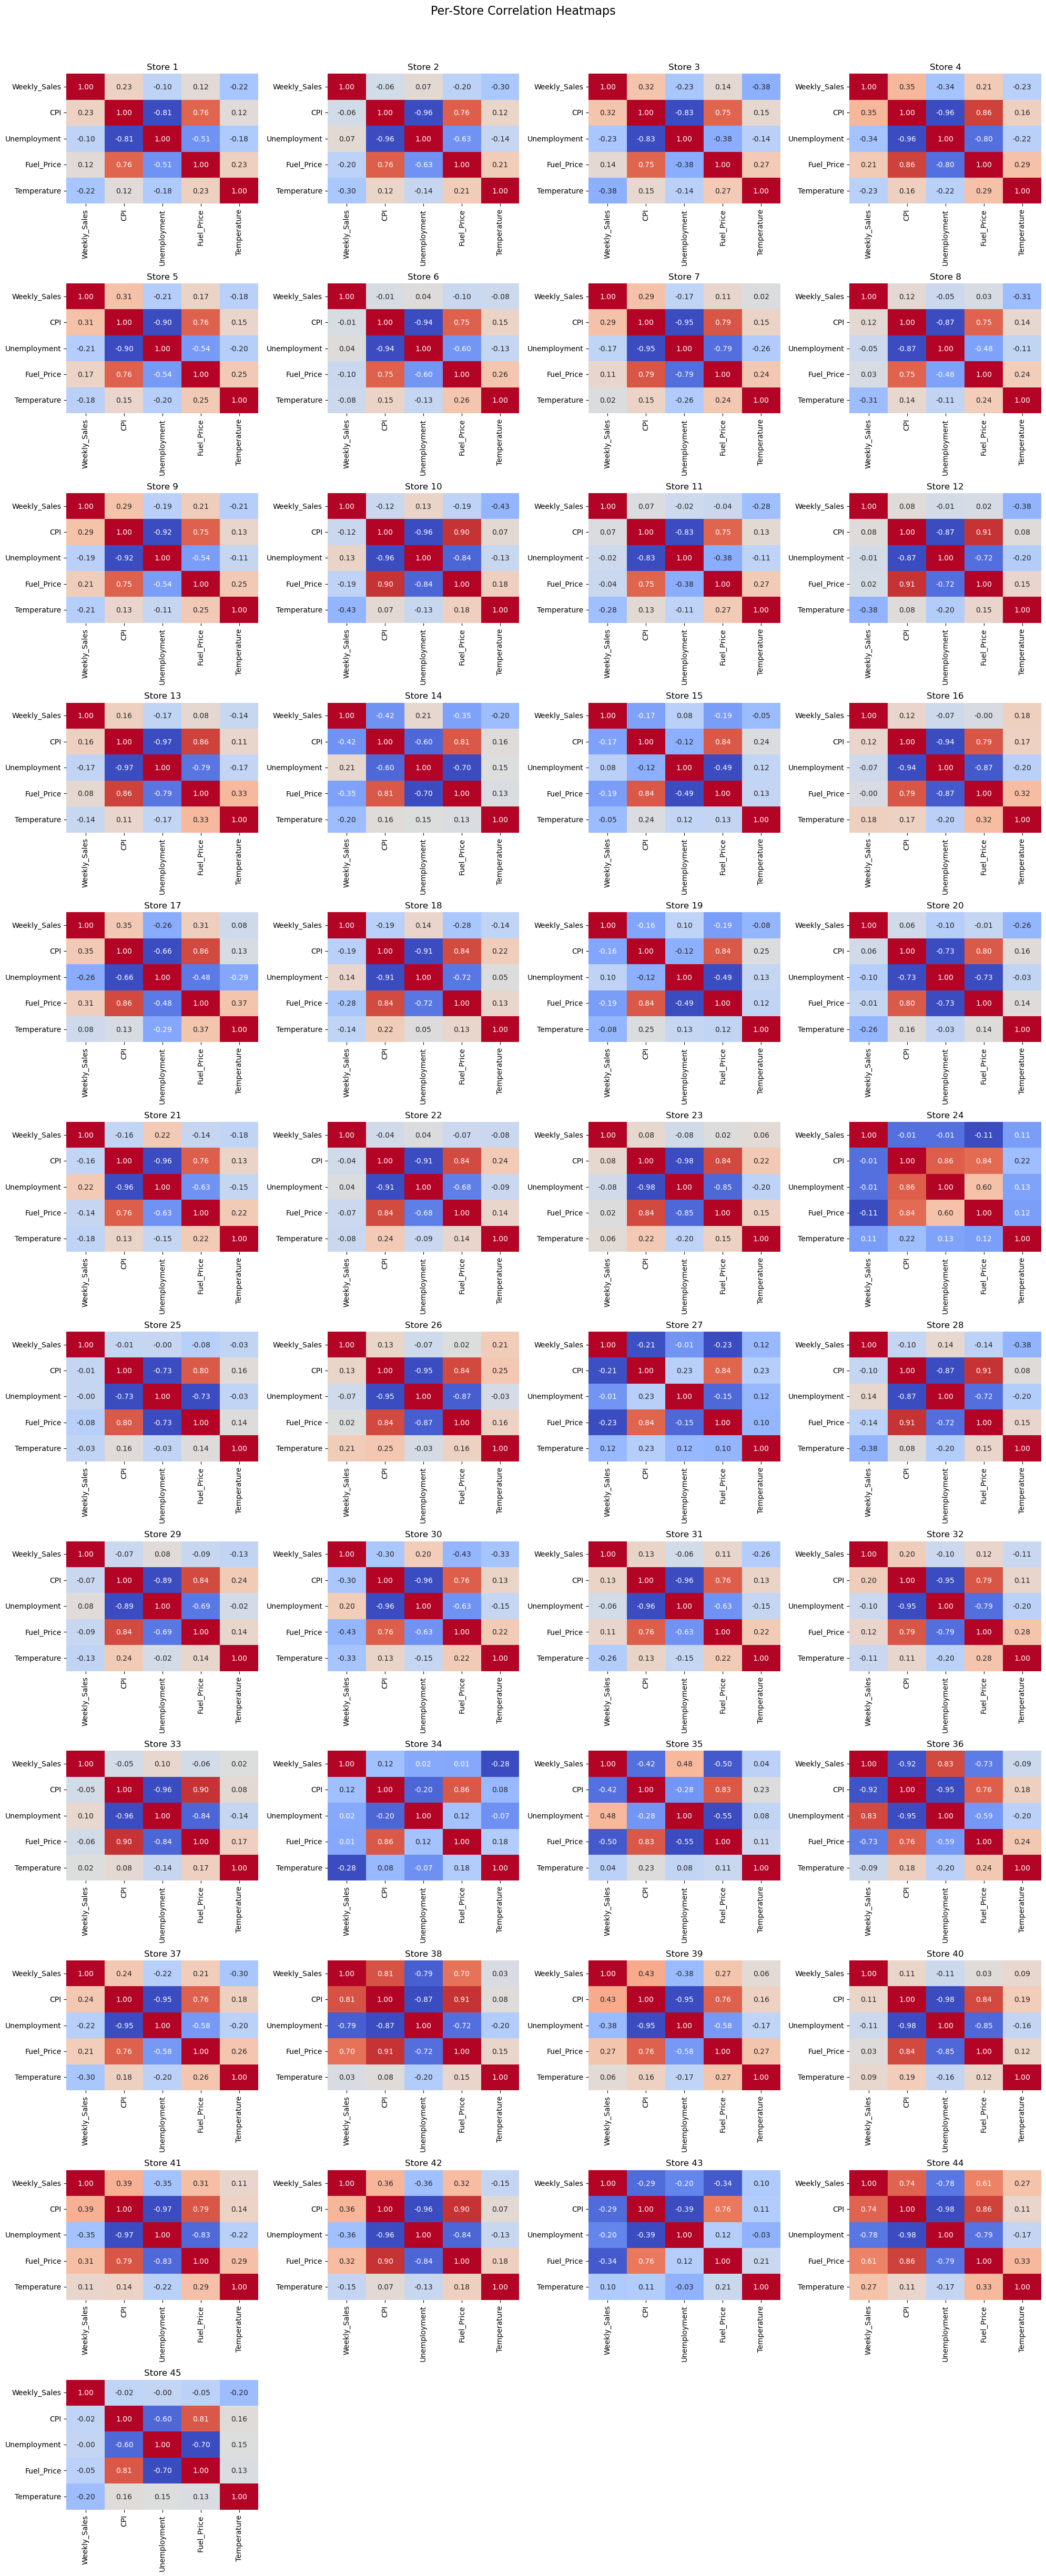

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure relevant columns
cols = ['Weekly_Sales', 'CPI', 'Unemployment', 'Fuel_Price', 'Temperature']

# Get unique store IDs
stores = df['Store'].unique()
n_stores = len(stores)

# Layout for subplots
n_cols = 4
n_rows = (n_stores // n_cols) + int(n_stores % n_cols != 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Loop through each store
for i, store_id in enumerate(sorted(stores)):
    store_data = df[df['Store'] == store_id][cols]
    corr = store_data.corr()

    sns.heatmap(corr, ax=axes[i], annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
    axes[i].set_title(f'Store {store_id}', fontsize=12)

# Remove extra empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Per-Store Correlation Heatmaps', fontsize=16, y=1.02)
plt.show()


### Findings from above:
  - A grid of heatmaps — one for each store
  - You can quickly spot:
  - Which stores have strong CPI or temperature impact on sales
  - Variation in patterns between stores

---

# Question 1e
# Top performing stores according to the historical data.

## To find the top-performing stores based on historical sales data, we can aggregate total or average `Weekly_Sales` per store and sort in descending order.

## Top Stores by Total Sales

In [18]:
top_total_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print(top_total_sales.head(10))  # Top 10 stores by total sales

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64


## Top Stores by Average Weekly Sales

In [19]:
top_avg_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
print(top_avg_sales.head(10))  # Top 10 stores by average weekly sales

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
10    1.899425e+06
27    1.775216e+06
6     1.564728e+06
1     1.555264e+06
39    1.450668e+06
Name: Weekly_Sales, dtype: float64


## Which to Choose?
 - Use total sales if you care about overall contribution to revenue.
 - Use average sales if you care about store performance consistency over time.

## Bar Plot for Top Stores

/tmp/ipykernel_7138/1945531980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_total_sales.head(10).index, y=top_total_sales.head(10).values, palette='viridis')


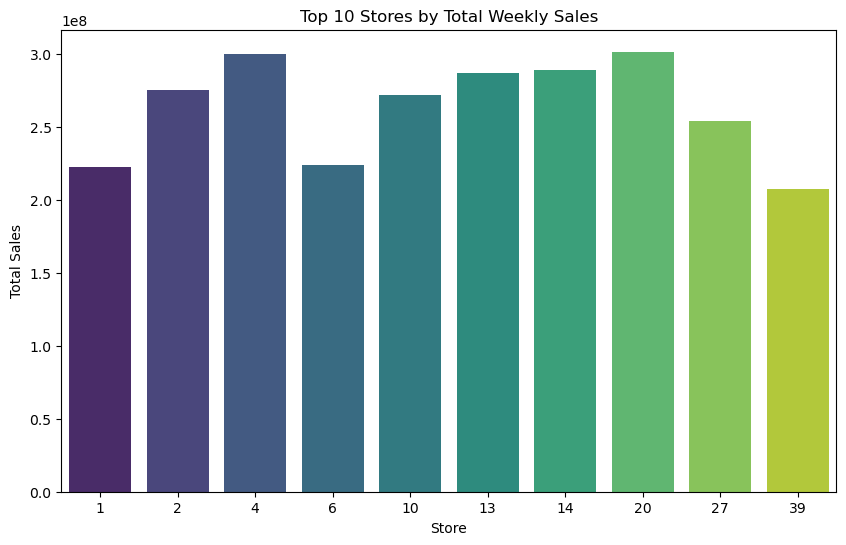

In [20]:
# Plot total sales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_total_sales.head(10).index, y=top_total_sales.head(10).values, palette='viridis')
plt.title('Top 10 Stores by Total Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

---

# Question 1f
# The worst performing store, and how significant is the difference between the highest and lowest performing stores.

## Calculate Total Sales Per Store

In [21]:
# Group by store and calculate total sales
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Top and bottom performing stores
best_store = store_sales.idxmax()
worst_store = store_sales.idxmin()

best_sales = store_sales.max()
worst_sales = store_sales.min()

print(f"🏆 Best Performing Store: {best_store} with total sales = ${best_sales:,.2f}")
print(f"🔻 Worst Performing Store: {worst_store} with total sales = ${worst_sales:,.2f}")
print(f"📉 Difference = ${best_sales - worst_sales:,.2f}")
print(f"🔍 Percentage difference = {(best_sales - worst_sales) / best_sales * 100:.2f}%")

🏆 Best Performing Store: 20 with total sales = $301,397,792.46
🔻 Worst Performing Store: 33 with total sales = $37,160,221.96
📉 Difference = $264,237,570.50
🔍 Percentage difference = 87.67%


## Visualization

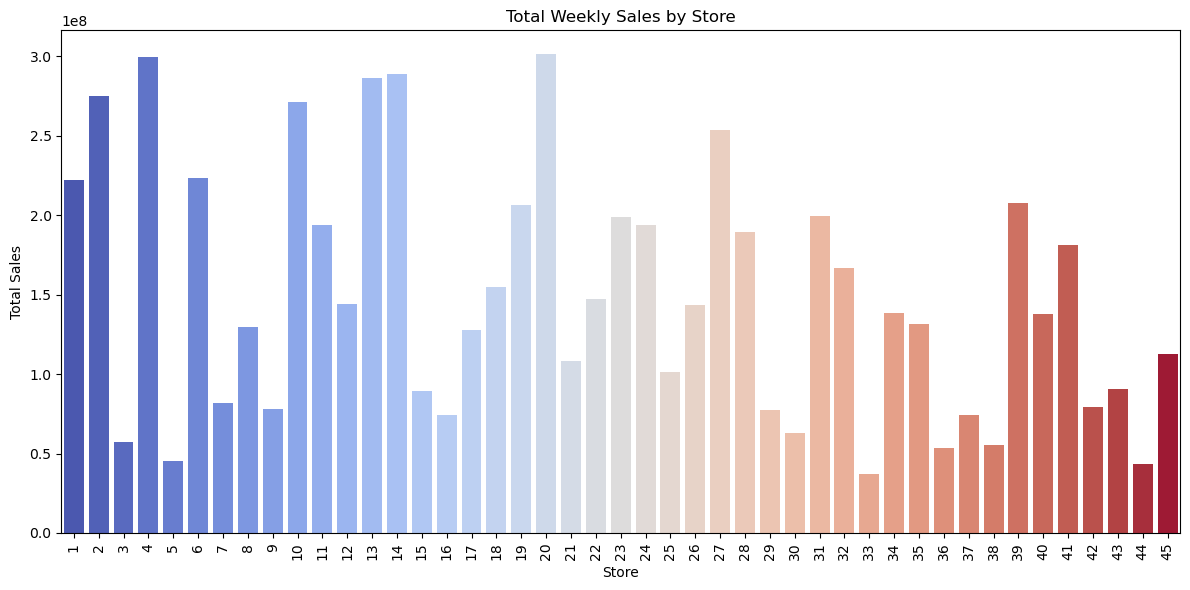

In [22]:
plt.figure(figsize=(12, 6))

# Assign `x` as hue and suppress legend
sns.barplot(x=store_sales.index, y=store_sales.values, hue=store_sales.index, palette='coolwarm', legend=False)

plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

---

# Question 2
# Use predictive modelingtechniques to forecast the sales for teach store for the next 12 weeks.

## Preprocessing the data

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Parse Date and sort data
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values(by=['Store', 'Date'], inplace=True)
df.set_index('Date', inplace=True)

## Fit SARIMAX model to capture time series components

In [24]:
# Function to fit SARIMAX model
def fit_sarimax(store_id, exog=None):
    # Filter data for store and aggregate weekly sales
    store_data = df[df['Store'] == store_id]['Weekly_Sales'].resample('W').sum()
    
    # If exogenous data is provided, filter it for the correct store and index it weekly
    if exog is not None:
        exog_data = df[df['Store'] == store_id][exog.columns].resample('W').mean()
    else:
        exog_data = None
    
    # Fit SARIMAX model
    model = SARIMAX(store_data,
                    order=(1, 1, 1),
                    seasonal_order=(1, 1, 1, 4),
                    exog=exog_data,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    results = model.fit(disp=False)
    return results

# Fit SARIMAX for Store 1 (adjust `exog` if you want to include external features)
sarimax_results = fit_sarimax(store_id=1, exog=df[['Holiday_Flag', 'CPI', 'Unemployment']].loc[df['Store'] == 1])

## Obtain residuals from SARIMAX

In [25]:
# Get the residuals (error terms)
residuals = sarimax_results.resid

## Prepare the features for XGBoost

In [26]:
import xgboost as xgb
from xgboost import XGBRegressor

# Create lag features and other features (like CPI, Holiday_Flag)
store_data = df[df['Store'] == 1]['Weekly_Sales'].resample('W').sum()
store_data_lagged = store_data.shift(1)  # 1-week lag (can create more lags)
store_data_rolling = store_data.rolling(window=4).mean()  # 4-week rolling mean

# Prepare the training data for XGBoost
X = pd.DataFrame({
    'Lag': store_data.shift(1),
    'Rolling_Mean': store_data.rolling(window=4).mean(),
    'CPI': df.loc[df['Store'] == 1, 'CPI'].shift(1).values,
    'Unemployment': df.loc[df['Store'] == 1, 'Unemployment'].shift(1).values,
    'Holiday_Flag': df.loc[df['Store'] == 1, 'Holiday_Flag'].shift(1).values,
})

X = X.dropna()
y = residuals.loc[X.index]

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Train an XGBoost model on the residuals
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X.values, y.values)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Make predictions

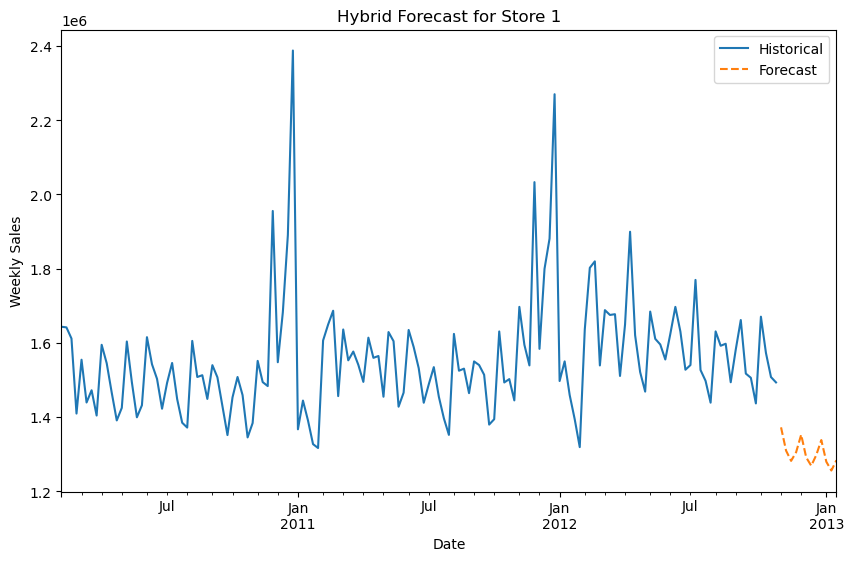

In [28]:
# Forecast using SARIMAX
forecast_sarimax = sarimax_results.get_forecast(steps=12, exog=df[['Holiday_Flag', 'CPI', 'Unemployment']].tail(12))
forecast_sarimax_mean = forecast_sarimax.predicted_mean

# Generate lagged and rolling features for XGBoost prediction
X_future = pd.DataFrame({
    'Lag': store_data[-1:].values,  # Last week's value (as lag)
    'Rolling_Mean': store_data_rolling[-1:].values,  # Last rolling mean
    'CPI': df['CPI'].iloc[-1],  # Latest CPI value
    'Unemployment': df['Unemployment'].iloc[-1],  # Latest Unemployment value
    'Holiday_Flag': df['Holiday_Flag'].iloc[-1],  # Latest Holiday flag value
})
# Predict residuals using XGBoost
forecast_residuals = xgb_model.predict(X_future)

# Combine SARIMAX forecast with XGBoost residuals
combined_forecast = forecast_sarimax_mean + forecast_residuals

# Create the forecast series
forecast_index = pd.date_range(start=store_data.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W')
forecast_series = pd.Series(combined_forecast, index=forecast_index)

# Plot the results
plt.figure(figsize=(10, 6))
store_data.plot(label='Historical')
forecast_series.plot(label='Forecast', linestyle='--')
plt.title('Hybrid Forecast for Store 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

## Explanation of the Solution:
 - **SARIMAX**: Models the seasonality and trend using historical weekly sales, optionally using external variables
(e.g., CPI, Holiday Flag, Unemployment).
 - **XGBoost**: Trains on the residuals from SARIMAX to capture additional patterns that the SARIMAX model didn't explain. It also uses lag features and rolling averages.
 - **Forecast**: Combine the outputs of both models — SARIMAX for seasonality/trend and XGBoost for residuals — to make a more accurate forecast for the next 12 weeks.